In [3]:
import habitat

import numpy as np
import random

%matplotlib inline
import matplotlib.pyplot as plt

In [5]:
# Habitat-API
# All the boilerplate code in the habitat-sim to set sensor config 
# and agent config is abstracted out in the Habitat-API config system.
# Default config is at habitat/config/default.py. 
# You can override defaults by specifying them in a separate file and pass it to the get_config function
# or defrost the config object, override parameters and freeze the config

config = habitat.get_config(config_paths='tasks/pointnav_mp3d.yaml')
config.defrost()
config.DATASET.DATA_PATH = 'mp3d_dummy/test/test.json.gz'
config.DATASET.SCENES_DIR = '/private/home/medhini/navigation-analysis-habitat/habitat-api/data/scene_datasets/'
config.freeze()

env = habitat.Env(config=config)

2019-07-09 17:56:27,292 initializing sim Sim-v0
I0709 17:56:27.300365 10393 simulator.py:78] Loaded navmesh /private/home/medhini/navigation-analysis-habitat/habitat-api/data/scene_datasets/mp3d/2t7WUuJeko7/2t7WUuJeko7.navmesh
2019-07-09 17:56:29,356 initializing task Nav-v0


# Scene semantic annotations

In [6]:
def print_scene_recur(scene, limit_output=10):
    count = 0
    for level in scene.levels:
#         print("Level ID:", level.id)
#         print("LEVEL-BOUNDS:", level.aabb.center[1] - level.aabb.sizes[1]/2, 
#               level.aabb.center[1] + level.aabb.sizes[1]/2)
        for region in level.regions:
            if region.category.name() == 'bedroom':
                count+=1
                return count
    return count
#         for region in level.regions:
#             print(
#                 f"Region id:{region.id}, category:{region.category.name()},"
#                 f" center:{region.aabb.center}, dims:{region.aabb.sizes}"
#             )
#             for obj in region.objects:
#                 print(
#                     f"Object id:{obj.id}, category:{obj.category.name()},"
#                     f" center:{obj.aabb.center}, dims:{obj.aabb.sizes}"
#                 )
#                 count += 1
#                 if count >= limit_output:
#                     return None

# Print semantic annotation information (id, category, bounding box details) 
# for the current scene in a hierarchical fashion
count = 0
for i in range(len(env.episodes)):
    obs = env.reset()
    scene = env.sim.semantic_annotations()
#     print('SCENE: ', env.current_episode.scene_id)
#     print('START POSITION: ', env.current_episode.start_position)
    count += print_scene_recur(scene, limit_output=15)
    
print(count)
env.close() 
# Note: Since only one OpenGL is allowed per process, 
# you have to close the current env before instantiating a new one.

I0709 17:56:29.378531 10393 simulator.py:78] Loaded navmesh /private/home/medhini/navigation-analysis-habitat/habitat-api/data/scene_datasets/mp3d/5ZKStnWn8Zo/5ZKStnWn8Zo.navmesh
I0709 17:56:37.344949 10393 simulator.py:78] Loaded navmesh /private/home/medhini/navigation-analysis-habitat/habitat-api/data/scene_datasets/mp3d/ARNzJeq3xxb/ARNzJeq3xxb.navmesh
I0709 17:56:41.797556 10393 simulator.py:78] Loaded navmesh /private/home/medhini/navigation-analysis-habitat/habitat-api/data/scene_datasets/mp3d/RPmz2sHmrrY/RPmz2sHmrrY.navmesh
I0709 17:56:43.979599 10393 simulator.py:78] Loaded navmesh /private/home/medhini/navigation-analysis-habitat/habitat-api/data/scene_datasets/mp3d/UwV83HsGsw3/UwV83HsGsw3.navmesh
I0709 17:56:49.879122 10393 simulator.py:78] Loaded navmesh /private/home/medhini/navigation-analysis-habitat/habitat-api/data/scene_datasets/mp3d/Vt2qJdWjCF2/Vt2qJdWjCF2.navmesh
I0709 17:56:55.338355 10393 simulator.py:78] Loaded navmesh /private/home/medhini/navigation-analysis-hab

14


# Take random actions and display sensor data

In [4]:
from PIL import Image
from habitat_sim.utils import d3_40_colors_rgb
import numpy as np

def display_sample(rgb_obs, semantic_obs, depth_obs):
    rgb_img = Image.fromarray(rgb_obs, mode="RGB")
    
    semantic_img = Image.new("P", (semantic_obs.shape[1], semantic_obs.shape[0]))
    semantic_img.putpalette(d3_40_colors_rgb.flatten())
    semantic_img.putdata((semantic_obs.flatten() % 40).astype(np.uint8))
    semantic_img = semantic_img.convert("RGBA")
    
    depth_img = Image.fromarray((depth_obs * 255).astype(np.uint8), mode="L")

    arr = [rgb_img, semantic_img, depth_img]
    
    titles = ['rgb', 'semantic', 'depth']
    plt.figure(figsize=(12 ,8))
    for i, data in enumerate(arr):
        ax = plt.subplot(1, 3, i+1)
        ax.axis('off')
        ax.set_title(titles[i])
        plt.imshow(data)
    plt.show()

2019-07-16 14:45:44,571 initializing sim Sim-v0
I0716 14:45:44.651355 70093 simulator.py:78] Loaded navmesh ../data/scene_datasets/mp3d/2azQ1b91cZZ/2azQ1b91cZZ.navmesh
2019-07-16 14:45:55,572 initializing task Nav-v0
I0716 14:45:55.754968 70093 simulator.py:78] Loaded navmesh ../data/scene_datasets/mp3d/TbHJrupSAjP/TbHJrupSAjP.navmesh


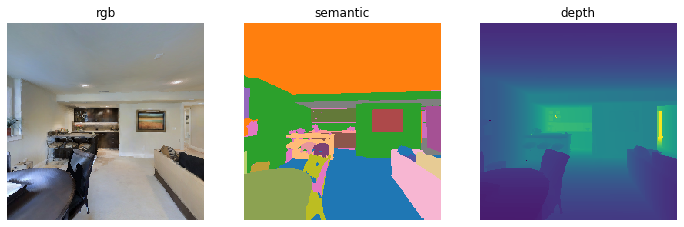

turn left


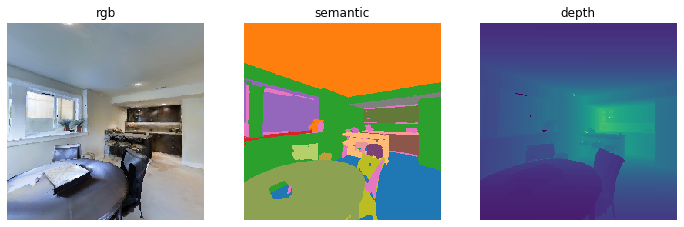

turn left


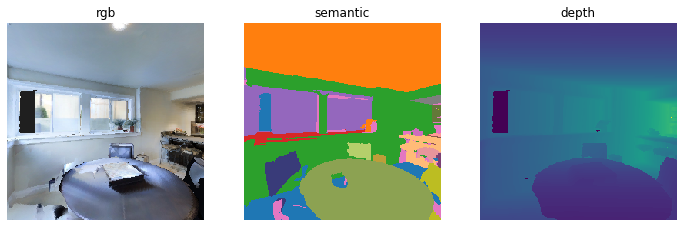

move_forward


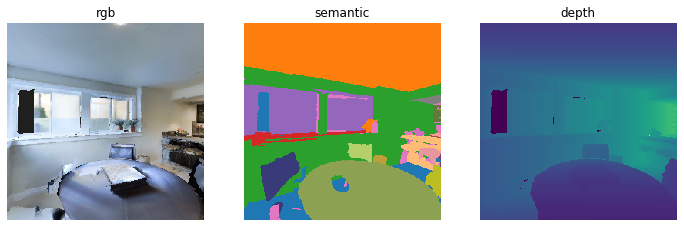

turn left


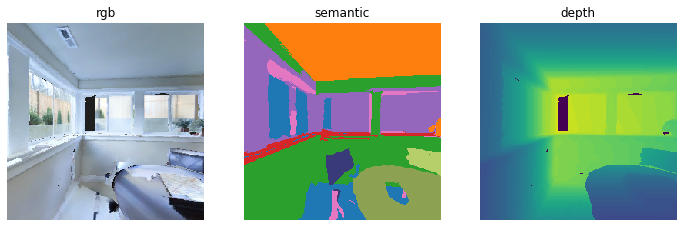

I0716 14:46:04.553506 70093 simulator.py:78] Loaded navmesh ../data/scene_datasets/mp3d/zsNo4HB9uLZ/zsNo4HB9uLZ.navmesh


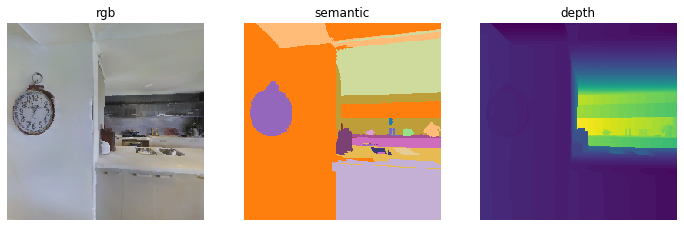

turn right


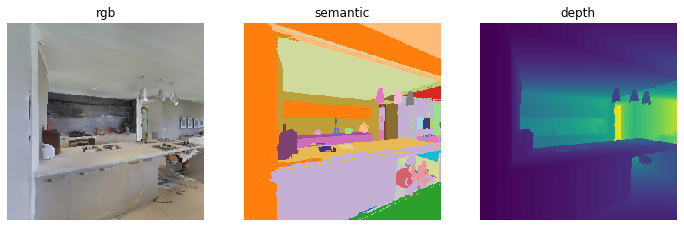

move_forward


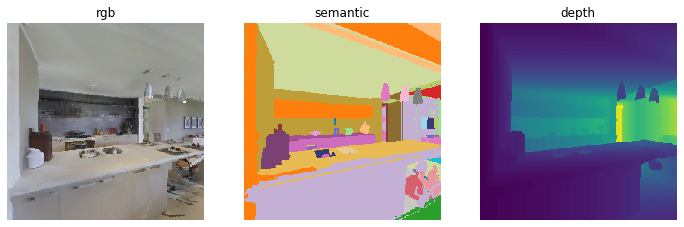

turn right


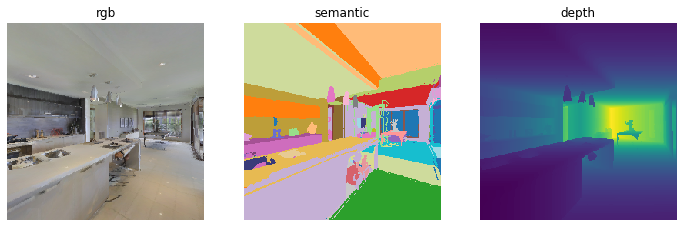

turn right


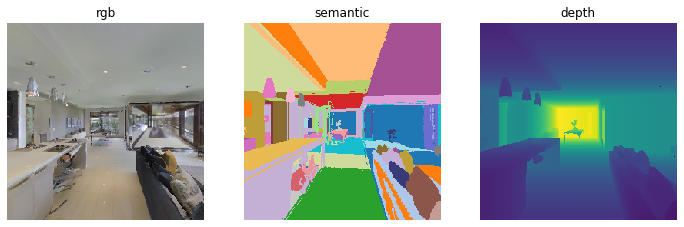

In [5]:
config = habitat.get_config(config_paths='../configs/tasks/pointnav_mp3d.yaml')
config.defrost()
config.DATASET.DATA_PATH = '../data/datasets/pointnav/mp3d/v1/val/val.json.gz'
config.DATASET.SCENES_DIR = '../data/scene_datasets/'
config.SIMULATOR.AGENT_0.SENSORS = ['RGB_SENSOR', 'DEPTH_SENSOR', 'SEMANTIC_SENSOR']
config.SIMULATOR.SEMANTIC_SENSOR.WIDTH = 256
config.SIMULATOR.SEMANTIC_SENSOR.HEIGHT = 256
config.SIMULATOR.TURN_ANGLE = 30
config.freeze()

env = habitat.Env(config=config)
env.episodes = random.sample(env.episodes, 2)

max_steps = 4

action_mapping = {
    0: 'stop',
    1: 'move_forward',
    2: 'turn left',
    3: 'turn right'
}

In [ ]:
        
env.close()